In [1]:
import pandas as pd
from os.path import expanduser
import matplotlib.pyplot as plt
import json

In [2]:
experiment_name = 'P3856'
run_name = 'P3856_YHE211_1_Slot1-1_1_5104'
precursor_definition_method = 'pasef'

In [3]:
BASE_DIR = '{}/P3856-results-cs-true-fmdw-true-2021-04-24-19-58-32'.format(expanduser('~'))

FEATURES_DIR = '{}/features-{}'.format(BASE_DIR, precursor_definition_method)
FEATURES_NAME = '{}/exp-{}-run-{}-features-{}.pkl'.format(FEATURES_DIR, experiment_name, run_name, precursor_definition_method)
FEATURES_DEDUP_NAME = '{}/exp-{}-run-{}-features-{}-dedup.pkl'.format(FEATURES_DIR, experiment_name, run_name, precursor_definition_method)

In [4]:
features_df = pd.read_pickle(FEATURES_DEDUP_NAME)['features_df']

In [5]:
print('{} features'.format(len(features_df)))

101898 features


In [6]:
mq_features_df = pd.read_pickle('/home/daryl/MQ-analysis-of-P3856/combined/P3856_YHE211_1_Slot1-1_1_5104-dwm.pkl')
mq_features_df['feature_id'] = mq_features_df.index.values.tolist()

In [7]:
print('{} MQ features'.format(len(mq_features_df)))

18437 MQ features


#### browsing for a feature

In [15]:
df = features_df[(features_df.monoisotopic_mz > 780) & (features_df.monoisotopic_mz < 781) & (features_df.rt_apex > 1830) & (features_df.rt_apex < 1850)]
df

,mz_apex_without_saturation_correction,mz_apex_with_saturation_correction,mz_lower,mz_upper,scan_apex,scan_lower,scan_upper,rt_apex,rt_lower,rt_upper,...,monoisotopic_mass,feature_intensity,envelope,isotope_count,deconvolution_score,precursor_cuboid_id,fragment_ions_l,fmdw_before_after_d,feature_id,run_name
55374,780.029497,780.029714,780.004654,780.054341,534.0,512,573,1834.638077,1829.346162,1838.341292,...,2337.067312,75732,"[[780.0294971506055, 77123.0], [780.3635697630...",5,943.145029,19902,"[{""singly_protonated_mass"": 217.0761, ""neutral...",{'before_fmdw': [{'singly_protonated_mass': 21...,1990203,P3856_YHE211_1_Slot1-1_1_5104
57852,780.855747,780.857583,780.830877,780.880617,572.0,521,592,1840.457547,1830.405171,1844.163753,...,3119.401225,59910,"[[780.8557471366717, 64485.0], [781.1023973131...",6,390.425013,20379,"[{""singly_protonated_mass"": 291.1465, ""neutral...",{'before_fmdw': [{'singly_protonated_mass': 29...,2037905,P3856_YHE211_1_Slot1-1_1_5104
60604,780.862986,780.858894,780.838116,780.887856,571.0,571,646,1847.867500,1845.221306,1855.279164,...,1559.703235,23695,"[[780.8629861664906, 29100.0], [781.3528246559...",4,358.860349,20920,"[{""singly_protonated_mass"": 315.1681, ""neutral...",{'before_fmdw': [{'singly_protonated_mass': 31...,2092003,P3856_YHE211_1_Slot1-1_1_5104
56466,780.029467,780.029980,780.004624,780.054311,565.0,565,597,1834.638077,1828.286737,1838.871281,...,2337.068112,18999,"[[780.0294671515977, 35245.0], [780.3652087003...",5,508.504966,20114,"[{""singly_protonated_mass"": 214.1544, ""neutral...",{'before_fmdw': [{'singly_protonated_mass': 21...,2011402,P3856_YHE211_1_Slot1-1_1_5104
56205,780.030140,780.029639,780.005296,780.054983,761.0,735,782,1835.166917,1831.992276,1839.400354,...,2337.067087,18808,"[[780.0301398682218, 26774.0], [780.3632053724...",5,571.890689,20062,"[{""singly_protonated_mass"": 294.1621, ""neutral...",{'before_fmdw': [{'singly_protonated_mass': 29...,2006201,P3856_YHE211_1_Slot1-1_1_5104
56207,780.068290,780.057644,780.043445,780.093135,747.0,725,766,1835.696421,1824.052775,1845.221306,...,2337.151103,2504,"[[780.0682902344199, 1531.0], [780.39113974552...",5,123.424640,20062,"[{""singly_protonated_mass"": 294.1621, ""neutral...",{'before_fmdw': [{'singly_protonated_mass': 29...,2006203,P3856_YHE211_1_Slot1-1_1_5104


feature = features_df.loc[60604]

#### selecting a feature by feature_id

In [32]:
feature = features_df[(features_df.feature_id == 2011402)].iloc[0]
print('precursor id: {}'.format(feature.precursor_cuboid_id))

precursor id: 20114


#### display the feature's attributes

In [33]:
feature

mz_apex_without_saturation_correction                                                     780.029
mz_apex_with_saturation_correction                                                         780.03
mz_lower                                                                                  780.005
mz_upper                                                                                  780.054
scan_apex                                                                                     565
scan_lower                                                                                    565
scan_upper                                                                                    597
rt_apex                                                                                   1834.64
rt_lower                                                                                  1828.29
rt_upper                                                                                  1838.87
mono_intensity_witho

#### browsing for an MQ feature

#### selecting an MQ feature by feature_id

#### selecting an MQ feature by index

In [34]:
mq_index_for_precursor = 20432  # from the notebook 'MaxQuant APL index from precursor id'
feature_mq = mq_features_df[(mq_features_df.mq_index == mq_index_for_precursor)].iloc[0]

#### display the feature's attributes

In [35]:
feature_mq

monoisotopic_mass                                              2337.07
charge                                                               3
monoisotopic_mz                                                 780.03
intensity                                                       169890
scan_apex                                                          534
rt_apex                                                           1836
raw_file                                 P3856_YHE211_1_Slot1-1_1_5104
mq_index                                                         20432
ms2_peaks            [{'mz': 199.10936, 'intensity': 16}, {'mz': 20...
feature_id                                                       15998
Name: 15998, dtype: object

In [36]:
fragment_ions_df = pd.DataFrame(json.loads(feature.fragment_ions_l))
fragment_ions_df['normalised_intensity'] = fragment_ions_df.intensity / fragment_ions_df.intensity.max()


In [37]:
fragment_ions_mq_df = pd.DataFrame(feature_mq.ms2_peaks)
fragment_ions_mq_df['normalised_intensity'] = fragment_ions_mq_df.intensity / fragment_ions_mq_df.intensity.max()


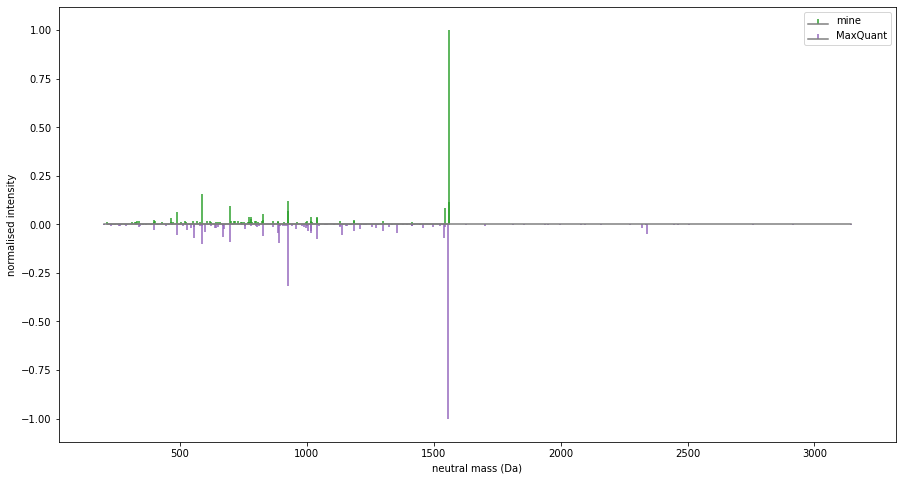

In [38]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# plot the raw data
markerline, stemlines, baseline = ax.stem(fragment_ions_df.singly_protonated_mass, fragment_ions_df.normalised_intensity, markerfmt=" ", use_line_collection=True, label='mine')
plt.setp(markerline, 'color', 'tab:green')
plt.setp(stemlines, 'color', 'tab:green')
plt.setp(baseline, 'color', 'tab:gray')

# plot the filtered data
markerline, stemlines, baseline = ax.stem(fragment_ions_mq_df.mz, -fragment_ions_mq_df.normalised_intensity, markerfmt=" ", use_line_collection=True, label='MaxQuant')
plt.setp(markerline, 'color', 'tab:purple')
plt.setp(stemlines, 'color', 'tab:purple')
plt.setp(baseline, 'color', 'tab:gray')

plt.xlabel('neutral mass (Da)')
plt.ylabel('normalised intensity')
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.legend(loc='best')
plt.title('')
plt.show()